<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/data_sprint_28_detect_trees_near_electric_wires_c16e82f09b154e1691b8b0833d8875a7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# **Getting Started Code For [Data Sprint #28](https://dphi.tech/challenges/data-sprint-28/68/overview/about) on DPhi**

## Download the images
We are given google drive link in the '[Data](https://dphi.tech/challenges/data-sprint-28/68/data)' section of problem page which has all the required train images (to build the model) and test images to predict the label of these images and submit the predictions on the [DPhi platform](https://dphi.tech/challenges/data-sprint-28/68/submit).

We can use **GoogleDriveDownloader** form **google_drive_downloader** library in Python to download the shared files from the shared Google drive link: https://drive.google.com/file/d/1ahtCipPXsX9BVRWi6nDG13tr4b_rMY97/view?usp=sharing

The file id in the above link is: **1ahtCipPXsX9BVRWi6nDG13tr4b_rMY97**

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1ahtCipPXsX9BVRWi6nDG13tr4b_rMY97',
                                    dest_path='content/detect_trees_near_electric_wires.zip',
                                    unzip=True)

We have all the files from the shared Google drive link downloaded in the colab environment.

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, tensorlow --> tf).

Note: You can import all the libraries that you think will be required or can import it as you go along.

In [2]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import accuracy_score

## Loading and preparing training data
The train and test images are given in two different folders - 'train' and 'test'. The labels of train images are given in a csv file 'train.csv' with respective image id (i.e. image file name).

#### Getting the labels of the images

In [3]:
labels = pd.read_csv("/content/content/detect_trees_near_electric_wires/train.csv")   # loading the labels
labels.head()           # will display the first five rows in labels dataframe

,file_name,Intersection
0,Image_1.jpg,0
1,Image_2.jpg,1
2,Image_3.jpg,1
3,Image_4.jpg,1
4,Image_5.jpg,1


In [4]:
labels.tail()            # will display the last five rows in labels dataframe

,file_name,Intersection
1437,Image_1438.jpg,1
1438,Image_1439.jpg,0
1439,Image_1440.jpg,1
1440,Image_1441.jpg,0
1441,Image_1442.jpg,1


#### Getting images file path

In [5]:
file_paths = [[fname, '/content/content/detect_trees_near_electric_wires/train/' + fname] for fname in labels['file_name']]

#### Confirming if no. of labels is equal to no. of images

In [6]:
# Confirm if number of images is same as number of labels given
if len(labels) == len(file_paths):
    print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  1442 matches the number of filenames i.e.  1442


#### Converting the file_paths to dataframe

In [7]:
images = pd.DataFrame(file_paths, columns=['file_name', 'filepaths'])
images.head()

,file_name,filepaths
0,Image_1.jpg,/content/content/detect_trees_near_electric_wi...
1,Image_2.jpg,/content/content/detect_trees_near_electric_wi...
2,Image_3.jpg,/content/content/detect_trees_near_electric_wi...
3,Image_4.jpg,/content/content/detect_trees_near_electric_wi...
4,Image_5.jpg,/content/content/detect_trees_near_electric_wi...


#### Combining the labels with the images

In [8]:
train_data = pd.merge(images, labels, how = 'inner', on = 'file_name')
train_data.head()       

,file_name,filepaths,Intersection
0,Image_1.jpg,/content/content/detect_trees_near_electric_wi...,0
1,Image_2.jpg,/content/content/detect_trees_near_electric_wi...,1
2,Image_3.jpg,/content/content/detect_trees_near_electric_wi...,1
3,Image_4.jpg,/content/content/detect_trees_near_electric_wi...,1
4,Image_5.jpg,/content/content/detect_trees_near_electric_wi...,1


The 'train_data' dataframe contains all the image id, their locations and their respective labels. Now the training data is ready.

## Data Pre-processing
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also we need to convert all the labels from categorical to numerical values.

In [9]:
data = []     # initialize an empty numpy array
image_size = 150      # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
  
  img_array = cv2.imread(train_data['filepaths'][i], )   # converting the image to gray scale cv2.IMREAD_GRAYSCALE

  new_img_array = cv2.resize(img_array, (image_size, image_size))
  flip_img_array=np.fliplr(new_img_array)      # resizing the image array
  data.append([new_img_array, train_data['Intersection'][i]])
  data.append([flip_img_array, train_data['Intersection'][i]])
  

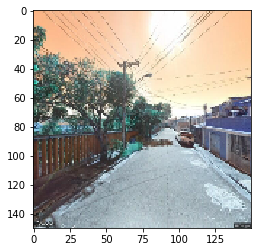

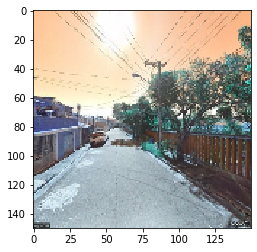

1
1


In [10]:
from matplotlib import pyplot as plt
plt.imshow(data[2][0], interpolation='nearest',)


plt.show()
plt.imshow(data[3][0], interpolation='nearest',)


plt.show()
print(data[2][1])
print(data[2][1])

In [11]:

# image pixels of a image
data[1]

[array([[[251, 252, 254],
         [255, 250, 252],
         [119,  98,  94],
         ...,
         [207, 197, 190],
         [208, 198, 191],
         [208, 198, 191]],
 
        [[245, 253, 254],
         [248, 252, 251],
         [253, 251, 247],
         ...,
         [209, 199, 192],
         [210, 200, 193],
         [210, 200, 193]],
 
        [[103, 110, 102],
         [101, 112, 104],
         [110, 119, 109],
         ...,
         [209, 199, 192],
         [209, 199, 192],
         [209, 199, 192]],
 
        ...,
 
        [[ 33,  33,  33],
         [ 31,  31,  31],
         [ 47,  47,  47],
         ...,
         [ 62,  61,  63],
         [ 61,  61,  61],
         [132, 134, 131]],
 
        [[ 29,  29,  29],
         [106, 106, 106],
         [120, 120, 120],
         ...,
         [ 52,  51,  53],
         [143, 143, 143],
         [148, 149, 146]],
 
        [[ 33,  33,  33],
         [ 30,  30,  30],
         [ 51,  51,  51],
         ...,
         [140, 138, 140],
  

#### Shuffle the data

In [12]:
np.random.shuffle(data)

#### Separating the images and labels


In [13]:
xx = []
yy = []
for image in data:
  xx.append(image[0])
  yy.append(image[1])

# converting x & y to numpy array as they are list
xx = np.array(xx)
yy = np.array(yy)

In [14]:
np.unique(yy, return_counts=True)

(array([0, 1]), array([1232, 1652]))

#### Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both independent and dependent data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [15]:
# split the data
X_train_o, X_val_o, y_train_o, y_val_o = train_test_split(xx,yy,test_size=0.5, random_state = 132)

X_train=X_train_o / 255
y_train=y_train_o
X_val=X_val_o / 255
y_val=y_val_o



In [16]:
X_train.shape

(1442, 150, 150, 3)

## Building Model
Now we are finally ready, and we can train the model.

There are many machine learning or deep learning models like Random Forest, Decision Tree, Multi-Layer Perceptron (MLP), Convolution Neural Network (CNN), etc. to say you some.


Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [17]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

In [18]:
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Model

In [30]:
tf.Variable.initializer
dropout_rate_conv1=0.73
dropout_rate_conv2=0.54

dropout_rate_d1=0.4 # 0,5
dropout_rate_d2=0.1 # 0,5

n_classes=1


In [37]:

# Defining the model




x = Input(shape=(image_size,image_size,3))

conv1 = Conv2D(filters=10,
                kernel_size=[2, 2],
                padding="same",
                activation="relu")(x)

pool1 = MaxPool2D(pool_size=[4, 4], strides=1)(conv1)
dropout1 = Dropout(rate=dropout_rate_conv1)(pool1)

conv2 = Conv2D(filters=10,
               kernel_size=[5, 5],
               padding="same",
               activation="relu")(dropout1)

pool2 = MaxPool2D(pool_size=[5, 5], strides=1)(conv2)               

dropout2 = Dropout(rate=dropout_rate_conv2)(pool2)

pool2_flat = Flatten()(dropout2)

dense1 = Dense(units=20, activation="relu")(pool2_flat)
dropout3 = Dropout(rate=dropout_rate_d1)(dense1)

dense2 = Dense(units=5, activation="relu")(dropout3)
dropout4 = Dropout(rate=dropout_rate_d2,)(dense2)

predictions = Dense(units = 2, activation='softmax')(dropout4)

model = Model(inputs=x, outputs=predictions)

opt = tf.keras.optimizers.Adamax(learning_rate=0.0001)
optimizer = tfa.optimizers.Lookahead(opt)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [38]:
model.summary()
#model=""

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 150, 150, 10)      130       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 147, 147, 10)      0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 147, 147, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 147, 147, 10)      2510      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 143, 143, 10)      0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 143, 143, 10)      0   

In [22]:
y_val.shape

(1442,)

In [ ]:
model.fit(X_train, y_train, epochs=380, batch_size=29,validation_data=(X_val,y_val),validation_freq=1)

Epoch 1/380
50/50 [==============================] - 4s 55ms/step - loss: 1.2253 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4334
Epoch 2/380
50/50 [==============================] - 2s 39ms/step - loss: 0.6937 - accuracy: 0.5128 - val_loss: 0.6930 - val_accuracy: 0.5666
Epoch 3/380
50/50 [==============================] - 2s 40ms/step - loss: 0.6929 - accuracy: 0.5893 - val_loss: 0.6928 - val_accuracy: 0.5666
Epoch 4/380
50/50 [==============================] - 2s 39ms/step - loss: 0.6926 - accuracy: 0.5885 - val_loss: 0.6926 - val_accuracy: 0.5666
Epoch 5/380
50/50 [==============================] - 2s 40ms/step - loss: 0.6928 - accuracy: 0.5521 - val_loss: 0.6925 - val_accuracy: 0.5666
Epoch 6/380
50/50 [==============================] - 2s 40ms/step - loss: 0.6921 - accuracy: 0.5943 - val_loss: 0.6923 - val_accuracy: 0.5666
Epoch 7/380
50/50 [==============================] - 2s 40ms/step - loss: 0.6923 - accuracy: 0.5642 - val_loss: 0.6922 - val_accuracy: 0.5666
Epoch 

In [ ]:
bcx  xsdsd

## Validate the model
Wonder🤔 how well your model learned! Lets check its performance on the X_val data.

In [ ]:
model.evaluate(X_val, y_val)

## Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. Testing_set_covid.csv).

#### Load Test Set
Load the test data on which final submission is to be made.

In [ ]:
# Loading the order of the image's name that has been provided
test_image_order = pd.read_csv("/content/content/detect_trees_near_electric_wires/Test.csv")
test_image_order.head()

#### Getting images file path

In [ ]:
file_paths = [[fname, '/content/content/detect_trees_near_electric_wires/test/' + fname] for fname in test_image_order['file_name']]

#### Confirm if number of images in test folder is same as number of image names in 'Test.csv'

In [ ]:
# Confirm if number of images is same as number of labels given
if len(test_image_order) == len(file_paths):
    print('Number of image names i.e. ', len(test_image_order), 'matches the number of file paths i.e. ', len(file_paths))
else:
    print('Number of image names does not match the number of filepaths')

#### Converting the file_paths to dataframe

In [ ]:
test_images = pd.DataFrame(file_paths, columns=['file_name', 'filepaths'])
test_images.head()

## Data Pre-processing on test_data


In [ ]:
image_size=100

In [ ]:
test_pixel_data = []     # initialize an empty numpy array
     # image size taken is 100 here. one can take other size too
for i in range(len(test_images)):
  
  img_array = cv2.imread(test_images['filepaths'][i],cv2.IMREAD_GRAYSCALE)   # converting the image to gray scale

  new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array

  test_pixel_data.append(new_img_array)

In [ ]:
test_pixel_data = np.array(test_pixel_data)

### Make Prediction on Test Dataset
Time to make a submission!!!

In [ ]:
pred = model.predict(test_pixel_data)

In [ ]:
# The predicted values are the probabilities value
for i in pred:
    print(i)

#### Take a threshold of 0.5
If the probability value is less than 0.5, the prediction is 0 (i.e. no intersection) else the prediction is 1 (i.e. intersection)

Since the submission format is given as 

predictions = [0, 1, 1, 0, 0, 0, 1, 0, ......]

here we will convert the probability values in the same format, i.e. if probability value is less than 0.5, the prediction will be 0 else the prediction will be 1

In [ ]:
prediction = []
for value in pred:
  if value[1] < 0.5:
    prediction.append(0)
  else:
    prediction.append(1)

In [ ]:
prediction[0]

**Note: Follow the submission guidelines given in 'How To Submit' Section.**

## **How to save prediciton results locally via jupyter notebook?**
If you are working on Jupyter notebook, execute below block of codes. A file named 'submission.csv' will be created in your current working directory.

In [ ]:
res = pd.DataFrame({'file_name': test_images['file_name'], 'prediction': prediction})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

# **OR,**
**If you are working on Google Colab then use the below set of code to save prediction results locally**

## **How to save prediction results locally via colab notebook?**
If you are working on Google Colab Notebook, execute below block of codes. A file named 'prediction_results' will be downloaded in your system.

In [ ]:
#res = pd.DataFrame({'file_name': test_images['file_name'], 'prediction': prediction})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res = pd.DataFrame({ 'prediction': prediction})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data

res.to_csv("submission.csv", index = False) 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

# **Well Done! 👍**
You are all set to make a submission. Let's head to the **[challenge page](https://dphi.tech/challenges/data-sprint-28/68/overview/about)** to make the submission.